# Apresentação:

O objetivo desse código é abordar os tópicos relacionados à,

1. **Técnicas de pré-processamento de imagem;**
2. OCR;
3. segmentação e extração de características de imagens;
4. detecção;
5. segmentação e reconhecimento de objetos;
6. classificação de imagens.

## Documentação utilizada:
* https://docs.opencv.org/4.x/index.html

In [2]:
# Biblioteca para trabalhar com imagens:
import cv2

# Bibioteca para lidar com requisições na internet:
import requests

# Biblioteca de Álgebra Linear:
import numpy as np

# Biblioteca para construção de Gráficos:
from matplotlib import pyplot as plt

# Biblioteca para Barra de Progressão:
from tqdm import tqdm

In [3]:
def downloadIMG(url,arqName, save = False, headers = {'user-agent':'Mozilla/5.0'}):
    '''
    Função construida para realizar o donwload
    de uma imagem na internet.

    Nota:
    A título de facilidade para importar essa função
    como módulo, já estou importanto uma lib específica
    na própria função.

    # Entrada:
    str: url da página na internet.

    # Saída:
    objeto Numpy: Matriz da imagem.
    '''
    # Download da Imagem:
    from io import BytesIO
    from PIL import Image

    
    # requisitando imagem:
    aquisition = requests.get(url)

    if aquisition.ok:
        # Gerando matriz de Valores:
        img = Image.open(BytesIO(aquisition.content))
        imgArray = np.array(img)
        
        if save:
            # Extraindo extensão:
            extension = url.split('.')[-1]
            
            # Salvando a imagem no arquivo especificado
            with open(f'{arqName}.{extension}', 'wb') as file:
                file.write(response.content)
            print('Imagens Baixada')

        return imgArray
        
    else:
        print(aquisition)
        print(aquisition.text)
        return

In [4]:
def plotImage(imgMatrix,eixos=False):
    '''
    Função que plota a imagem utilizando
    a matriz da imagem.

    # Entrada:
    objeto numpy ou list: Matriz da imagem.
    '''

    # Exibindo a imagem usando Matplotlib
    plt.imshow(imgMatrix)
    if not eixos:
        plt.axis('off')  # Oculta os eixos
        
    plt.show()

In [5]:
# url da Imagem:
url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT94IdJxw_iR4YBUfb-4_G_453uMLCeftUiCA&s"
img = downloadIMG(url,'img')

Existe ainda uma forma mais fácil de se baixar imagens. A título de exercício e teste de conhecimento, fiz das duas formas.

In [6]:
# Baixando imagem por comando.
!curl -O https://blog-static.petlove.com.br/wp-content/uploads/2021/08/Gato-filhote-7.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20745  100 20745    0     0  27470      0 --:--:-- --:--:-- --:--:-- 27549


In [7]:
# Visualizando Imagem (OpenCV):
imagem	= cv2.imread("img.jpg")

# Gerando Janela externa:
cv2.imshow("Imagem", imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

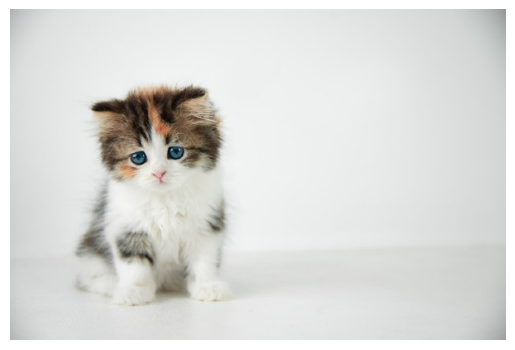

In [8]:
# Visualizando Imagem (OpenCV):
imagem	= cv2.imread("img.jpg")

# Converte a imagem de BGR para RGB (O padrão é BGR)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Exibe a imagem usando Matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Oculta os eixos
plt.show()

# Pré-processamento de Imagem:

Em um sistema baseado em **Visão Computacional**, a etapa de pré-processamento consiste em realçar objetos de interesse em imagens, facilitando segmentá-los posteriormente. Para realçar esses objetos, existem inúmeros procedimentos que podem ser realizados, como operações aritméticas, operações geométricas, métodos para ajuste de contraste e tratamento de ruído. Uma imagem é uma matrix, de modo que a manipulação da imagem é toda mapeada pelas operações da **Álgebra Linear**.

# Histograma dos Canais de Cores:

Uma das primeiras abordagens de análise das imagem aqui é a análise de histógrama das imagens. De modo que conseguimos ter um primeiro *approach* sobre o comportamento espectral das imagens.

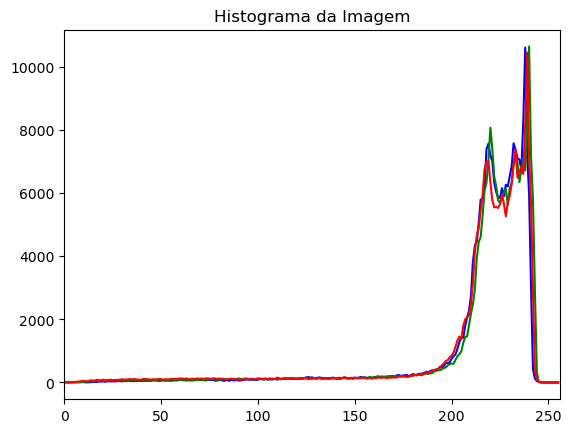

In [9]:
# Histograma da imagem:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imagem_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma da Imagem')
plt.show()

In [10]:
# Pinçando Pixel:
from random import randint
indice = randint(0,np.max(imagem_rgb))
print(imagem_rgb[indice,indice,0])

83


In [11]:
# Gerando Matrix teste:
teste = imagem_rgb.copy()

# Alterando Elementos:
for line in tqdm(teste[indice]):
    line = [255,255,255]

100%|████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<?, ?it/s]


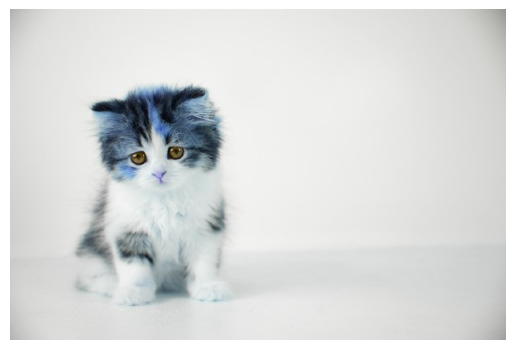

In [12]:
# Converte a imagem de BGR para RGB (O padrão é BGR)
imagemAlterada = cv2.cvtColor(teste, cv2.COLOR_BGR2RGB)

# Exibeindo a imagem usando Matplotlib
plt.imshow(imagemAlterada)
plt.axis('off')  # Oculta os eixos
plt.show()

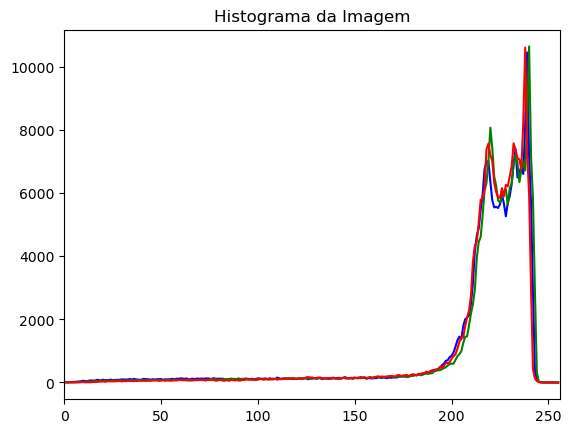

In [13]:
# Histograma da imagem:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([imagemAlterada],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma da Imagem')
plt.show()

Podemos ver que houve uma alteração, mas bem pouquinho nesse caso.

In [14]:
# Dimensão da Matrix:
imagem_rgb.shape

(400, 600, 3)

Ou seja, 400 linhas, 600 colunas e 3 canais de cores (B,G,R).

Para obtermos o total de pixels da imagem, podemos multiplicar o total de linhas pelo total de colunas e pelo total de cores, ou, simplesmente, utiliza o método `size`. Porem o método `size` faz um dimensionamento de todas as dimensões, levando em consideração os canais de cores, o que não queremos, então precisamos dividir pela dimensão dos canais de cores.

In [15]:
# Tamanho da Imagem:
print(imagem_rgb.shape[0]*imagem_rgb.shape[1], type(imagem_rgb.shape[0]*imagem_rgb.shape[1]))
print(imagem_rgb.size/imagem_rgb.shape[2],type(imagem_rgb.size/imagem_rgb.shape[2]))

240000 <class 'int'>
240000.0 <class 'float'>


Podemos notar também que as saídas são de tipos diferentes. Um detalhe que pode não parecer relevante, mas em niveis mais aprofundados, pode fazer diferênça.

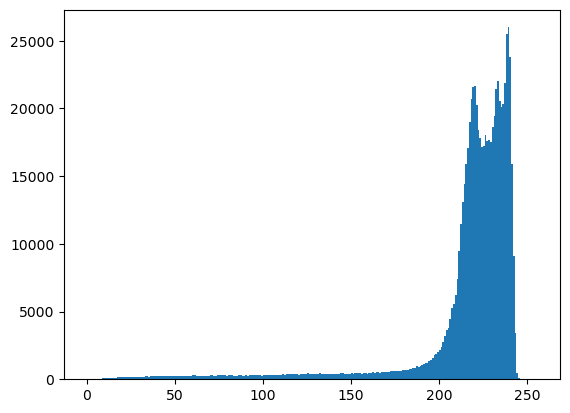

In [16]:
# Histograma:
plt.hist(imagem_rgb.ravel() ,256, [0,256])
plt.show()

O método `ravel`, aplicado no primeiro parâmetro, tem a finalidade de transformar a imagem em um vetor, isto é, organizar todos os elementos em uma estrutura contendo uma única linha e N colunas — em que N representa o total de pixels da imagem. Executando o código exemplificado, obtemos o seguinte histograma para a imagem carregada:



A função `hist` possui 3 parâmetros fundamentais:

* O primeiro é a imagem com a qual desejamos trabalhar;
* O segundo é o número de elementos distintos que podem ser representados; e
* O terceiro indica o intervalo entre os elementos.

O método `ravel`, aplicado no primeiro parâmetro, tem a finalidade de transformar a imagem em um vetor, isto é, organizar todos os elementos em uma estrutura contendo uma única linha e N colunas — em que N representa o total de pixels da imagem. É válido lembrar dizer que, se fosse uma imagem em tons de cinza, estes elementos seriam números inteiros, variando de 0 (preto) a 255 (branco), ou seja, 256 tonalidades distintas.

In [17]:
# Verificando o método ravel:
len(imagem_rgb.ravel())

720000

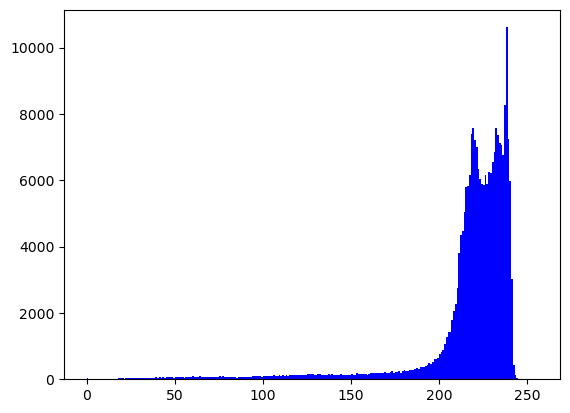

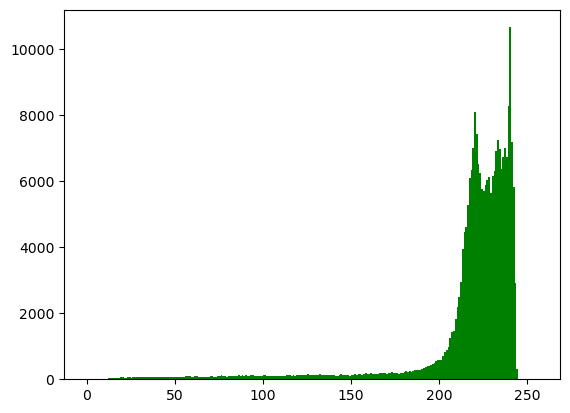

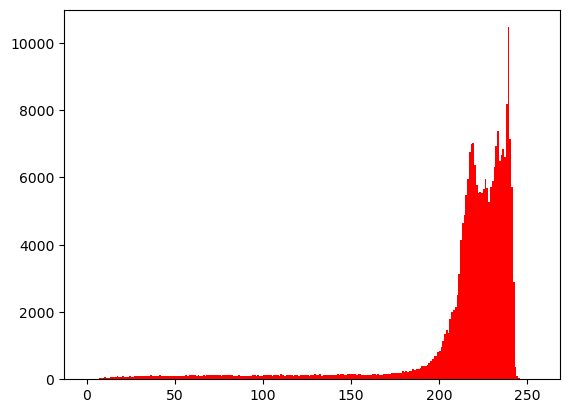

In [18]:
# Separando os canais de Cores:
azul, verde, vermelho = cv2.split(imagem_rgb)

# Gerando Histograma do Azul:
plt.hist(azul.ravel(), 256, [0,256], color='blue')
plt.figure();

# Gerando Histograma do Verde:
plt.hist(verde.ravel(), 256, [0,256], color='green')
plt.figure();

# Gerando Histograma do Vermelho:
plt.hist(vermelho.ravel(), 256, [0,256], color='red')
plt.show()

# Transformações Geométricas:

Muitas vezes precisamos aplicar transformações geométricas em imagens. Estas transformações consistem em invertê-la horizontalmente ou verticalmente, rotacioná-la, ajustar sua escala ou a perspectiva. Nos tópicos desta seção, será exemplificado como cada uma dessas transformações podem ser realizadas com auxílio da biblioteca OpenCV.

## Operação de Rotação:

Para realizar essa operação, duas funções da biblioteca OpenCV são necessárias: a `getRotationMatrix2D` e a `warpAffine`. A primeira delas é utilizada para obter a matriz de rotação, que será usada como parâmetro na função warpAffine. A função `getRotationMatrix2D` também possui parâmetros, e cada um deles foi discriminado na tabela:

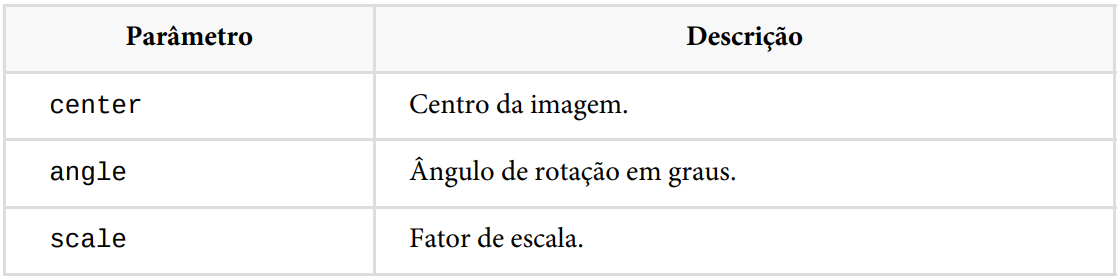

In [19]:
# Rotacionando as imagens:
totalLinhas, totalColunas	=	imagem_rgb.shape[:-1]

# Gerando a matriz de rotação:
matriz	= cv2.getRotationMatrix2D((totalColunas/2, totalLinhas/2),90,	1) # rotação em 90°

Com a matriz de rotação obtida, a próxima etapa consiste em gerar a imagem rotacionada. Para esse procedimento, vamos utilizar a função `warpAffine`, que possui seus três parâmetros obrigatórios discriminados a seguir.

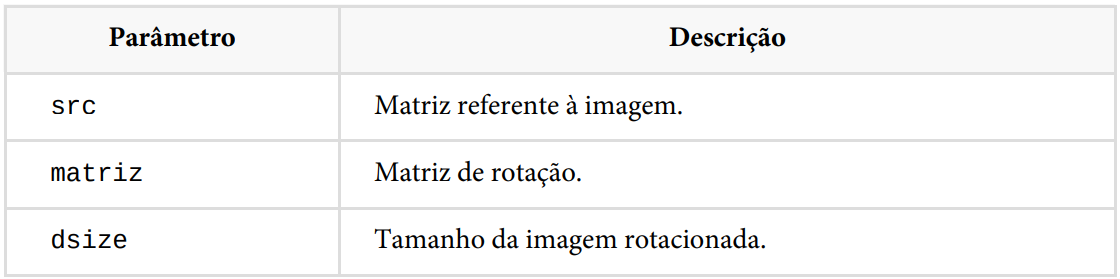

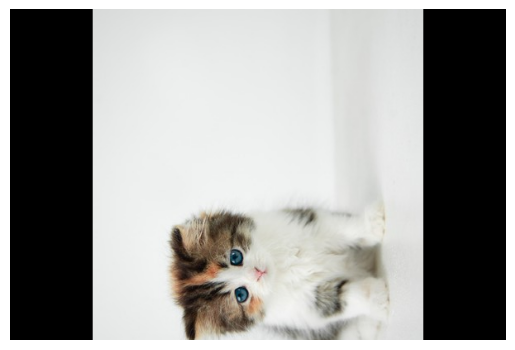

In [20]:
# Rotacionando a imagem:
imagemRotacionada =	cv2.warpAffine(imagem_rgb,matriz,(totalColunas,	totalLinhas))

# Visualizando a imagem:
plt.imshow(imagemRotacionada)
plt.axis('off')  # Oculta os eixos
plt.show()

## Operação de Translação:

A operação de translação consiste em deslocar uma imagem de posição. A função que nos permite realizar essa operação é a `warpAffine`, a mesma utilizada para rotacioná-la. Para deslocar a imagem, precisamos de uma matriz de translação, que indicará para qual posição a imagem será movida.

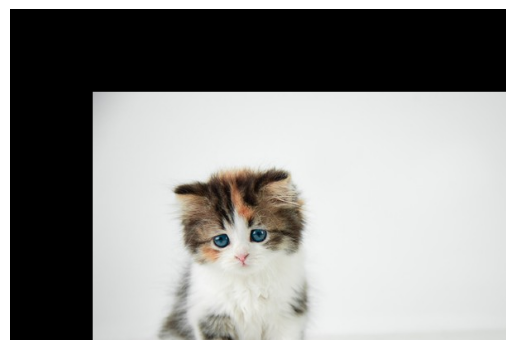

In [21]:
# Gerando Matriz de Transformação:
matriz = np.float32([[1,0,100],	[0,1,100]])

# Gerando imagem deslocada:
imagemDeslocada	= cv2.warpAffine(imagem_rgb,
                                 matriz,
                                 (totalColunas,	totalLinhas))

# Visualizando Imagem:
plotImage(imagemDeslocada)

## Ajuste de Escala:

Podemos também ajustar o tamanho da imagem e a biblioteca OpenCV nos ajuda com isso com a função `resize`.

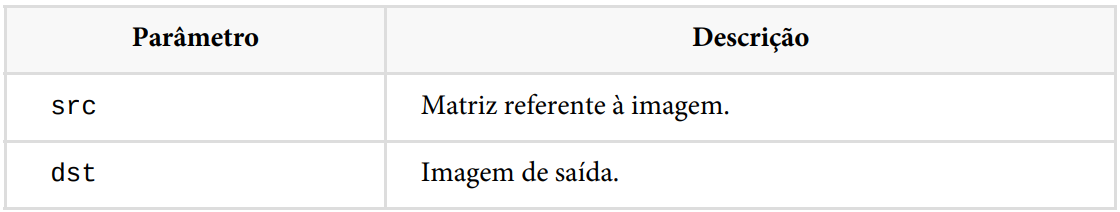

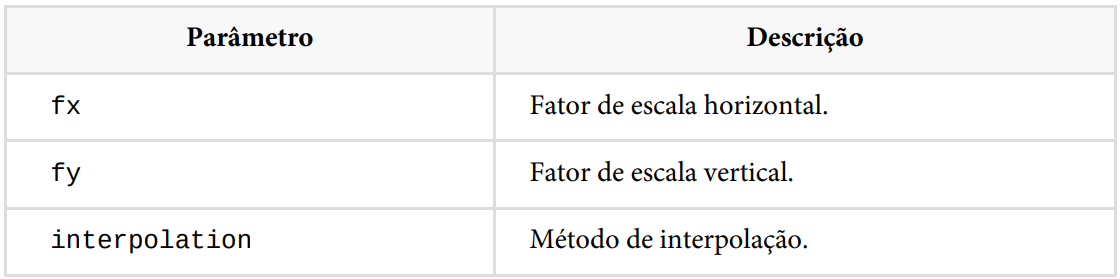

Os parâmetros `fx` e `fy` são valores numéricos positivos. Estes definem o quão ampliada ou reduzida será a imagem. Mantendo esses dois parâmetros com valor igual a 1.0, a imagem não sofrerá ajustes de escala. Dobrando os valores para 2.0, será gerada uma nova imagem ampliada, com o dobro da largura e altura.

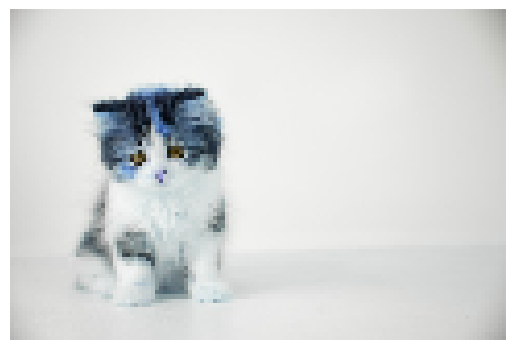

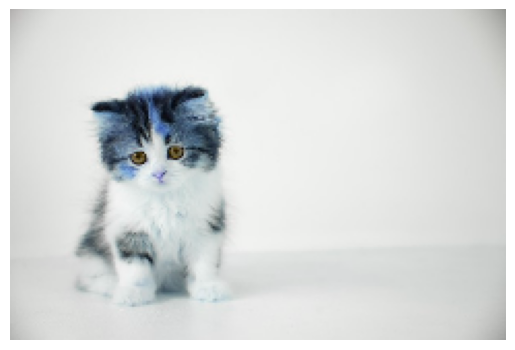

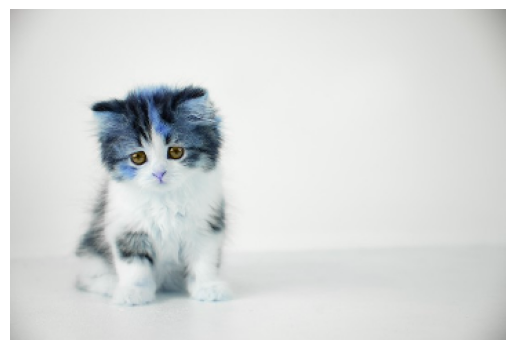

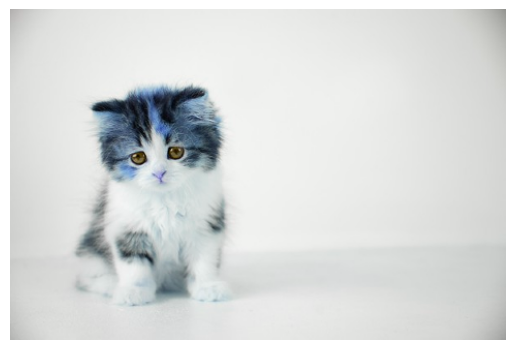

In [22]:
for i in range(1, 5):  # Itera de 1 a 4 para múltiplos redimensionamentos
    scale_factor = i / 5  # Define um fator de escala diferente em cada iteração
    # Redimensionando imagem:
    imagemModificada = cv2.resize(imagem_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

    # Visualizando Imagem:
    plt.imshow(cv2.cvtColor(imagemModificada, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Ajuste de Pespectiva:

Esse aqui é bem legal, muito útil quando a imagem está fora de perspectiva. Para corrigir as distorções de perspectiva, podemos usar a função `warpPerspective` da biblioteca OpenCV. Ela ajusta a perspectiva de uma imagem tendo como referência uma matriz predefinida de pontos, gerada pela função `getPerspectiveTransform`.

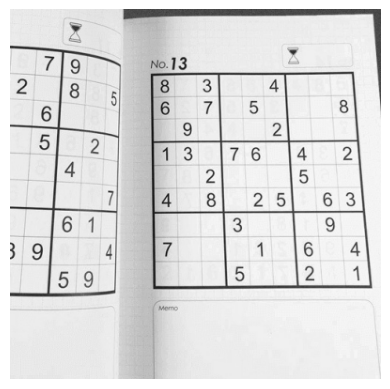

In [23]:
# Importando imagem:
imagemOriginal = cv2.imread("sudoku.png")
plotImage(imagemOriginal)

In [24]:
# Construindo ajustes:
pontosIniciais	=	np.float32([[189,87], [459,84], [192,373],[484,372]])
pontosFinais	=	np.float32([[0,0],[500,0],[0,500],[500,500]])

# Gerando matriz de Transformação Linear:
matriz	=	cv2.getPerspectiveTransform(pontosIniciais,	pontosFinais)

# Modificando Perspectiva:
imagemModificada = cv2.warpPerspective(imagemOriginal, matriz, (500,500))

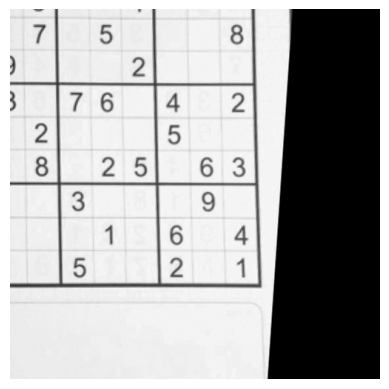

In [25]:
plotImage(imagemModificada)

# Transformações Aritméticas:

As operações aritméticas em imagens	nos	permitem adicionar o conteúdo de uma imagem em outra, ou até mesmo misturá-los. Operações abordadas:

* Operação de Soma;
* Operação de Subtração;
* Operação de Mesclagem (Soma ponderada);
* Multiplicação e divisão.


## Operação de Soma

A operação de adição consiste em somar os valores dos pixels de uma imagem com outra(s), resultando em uma nova imagem. A função `add()` da biblioteca OpenCV nos permite realizar rapidamente essa operação.

In [39]:
# Importando Imagens:
imagemFichasVermelhas =	cv2.imread("fichas-vermelhas.png")
imagemFichasPretas = cv2.imread("fichas-pretas.png")

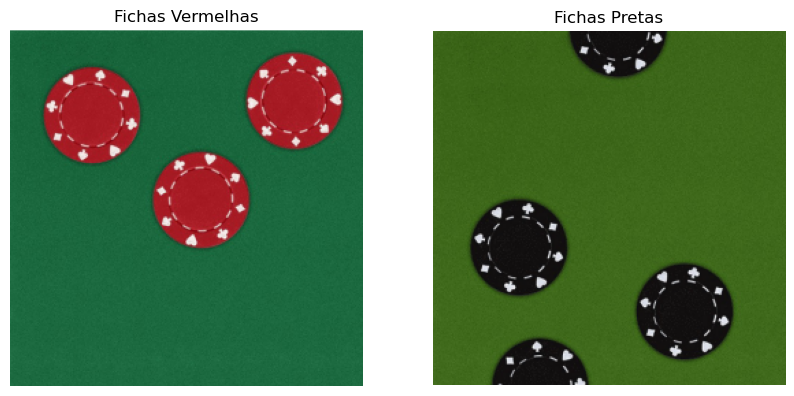

In [40]:
# Convertendo de BGR para RGB:
imagemFichasVermelhas = cv2.cvtColor(imagemFichasVermelhas, cv2.COLOR_BGR2RGB)
imagemFichaspretas = cv2.cvtColor(imagemFichasPretas, cv2.COLOR_BGR2RGB)

# Plotar as imagens
plt.figure(figsize=(10, 5))

# Primeira imagem
plt.subplot(1, 2, 1)
plt.imshow(imagemFichasVermelhas)
plt.title("Fichas Vermelhas")
plt.axis('off')

# Segunda imagem
plt.subplot(1, 2, 2)
plt.imshow(imagemFichasPretas)
plt.title("Fichas Pretas")
plt.axis('off')

plt.show()

In [41]:
# Checando shape das imagens:
print(imagemFichasVermelhas.shape)
print(imagemFichasPretas.shape)

(261, 258, 3)
(259, 258, 3)


Vemos que o numero de linhas das matrizes não são os mesmos. Isso signficia que a operação de soma não está definida, ou seja, precisamos redimensionar o tamanho das imagens. Algebra linear, imagens são matrizes, então para somar imagens, estamos somando matrizes, e a soma de matrizes precisa estar bem definida.

In [42]:
# Redimensionar o tamanho de uma imagem pela outra:
imagemFichasVermelhasRedimensionada = cv2.resize(imagemFichasvermelhas, (imagemFichasPretas.shape[1], imagemFichasPretas.shape[0]))
imagemFichasVermelhas = cv2.cvtColor(imagemFichasVermelhasRedimensionada,cv2.COLOR_BGR2RGB) # Instanciando outra imagem RGB

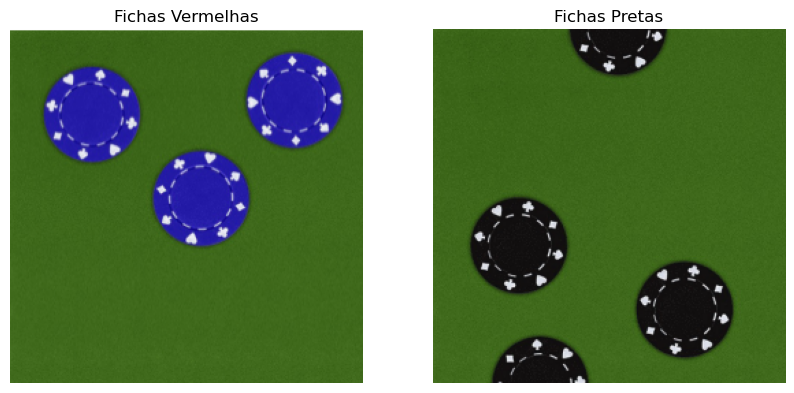

In [43]:
# Plotar as imagens
plt.figure(figsize=(10, 5))

# Primeira imagem
plt.subplot(1, 2, 1)
plt.imshow(imagemFichasVermelhas)
plt.title("Fichas Vermelhas")
plt.axis('off')

# Segunda imagem
plt.subplot(1, 2, 2)
plt.imshow(imagemFichasPretas)
plt.title("Fichas Pretas")
plt.axis('off')

plt.show()

In [44]:
# Somando Imagens:
imagemSomadas = cv2.add(imagemFichasVermelhas, imagemFichasPretas)

(-0.5, 257.5, 258.5, -0.5)

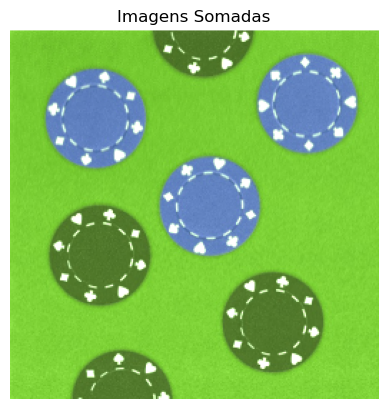

In [45]:
plt.imshow(imagemSomadas)
plt.title("Imagens Somadas")
plt.axis('off')

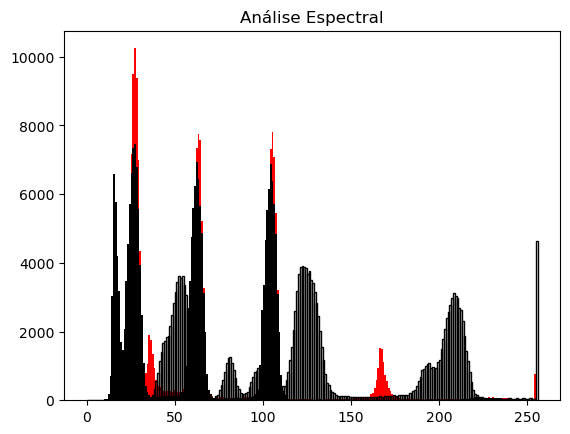

In [46]:
# Historgras:
plt.hist(imagemFichasVermelhas.ravel(),	256, [0,256], color='red')
plt.hist(imagemFichasPretas.ravel(),256, [0,256], color='black')
plt.hist(imagemSomadas.ravel(),	256, [0,256], fill=False)
plt.title("Análise Espectral")
plt.show()

In [47]:
# Ajustando tonalidade da imagem:
imagemClara	= cv2.add(imagemSomadas, 40)
imagemEscura = cv2.add(imagemSomadas, -40)

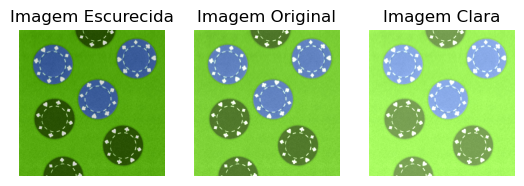

In [58]:
# primeira imagem
plt.subplot(1, 3, 1)
plt.imshow(imagemEscura)
plt.title("Imagem Escurecida")
plt.axis('off')

# Segunda imagem
plt.subplot(1, 3, 2)
plt.imshow(imagemSomadas)
plt.title("Imagem Original")
plt.axis('off')


# Terceira imagem
plt.subplot(1, 3, 3)
plt.imshow(imagemClara)
plt.title("Imagem Clara")
plt.axis('off')




plt.show()

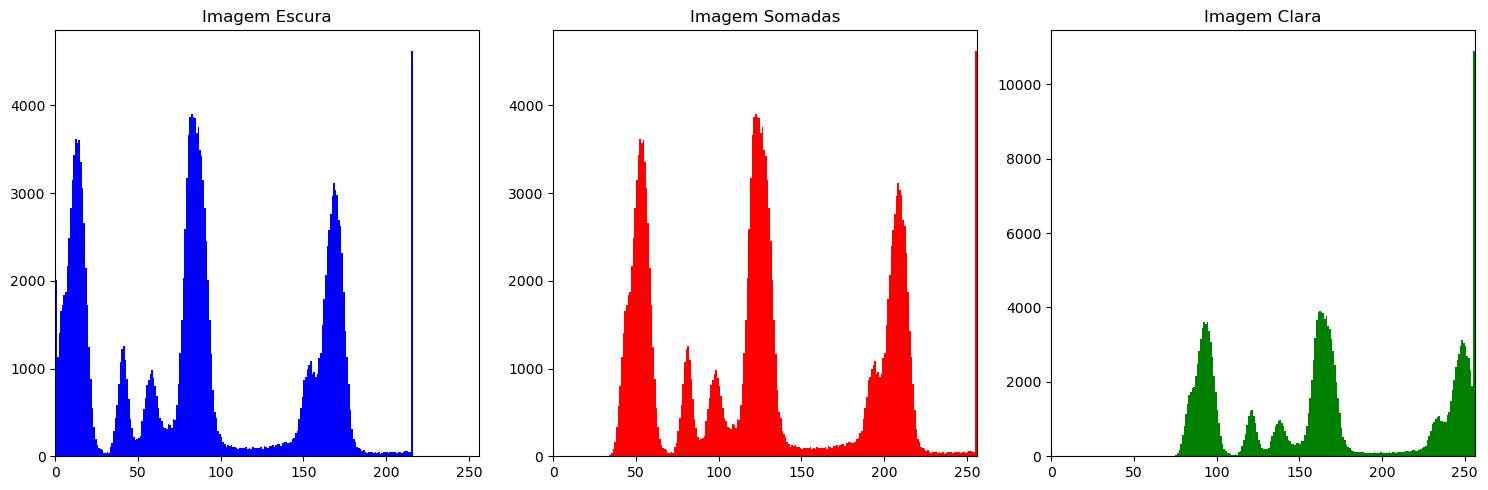

In [57]:
# Criar uma figura com subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))



# Histograma para a imagemEscura
axs[0].hist(imagemEscura.ravel(), 256, [0, 256], color='b')
axs[0].set_title('Imagem Escura')
axs[0].set_xlim([0, 256])

# Histograma para a imagemSomadas
axs[1].hist(imagemSomadas.ravel(), 256, [0, 256], color='r')
axs[1].set_title('Imagem Somadas')
axs[1].set_xlim([0, 256])

# Histograma para a imagemClara
axs[2].hist(imagemClara.ravel(), 256, [0, 256], color='g')
axs[2].set_title('Imagem Clara')
axs[2].set_xlim([0, 256])


# Ajustar o layout para não sobrepor títulos e labels
plt.tight_layout()
plt.show()

Uma outra forma de visualizar essa relação, de forma bem interessante, é 3D

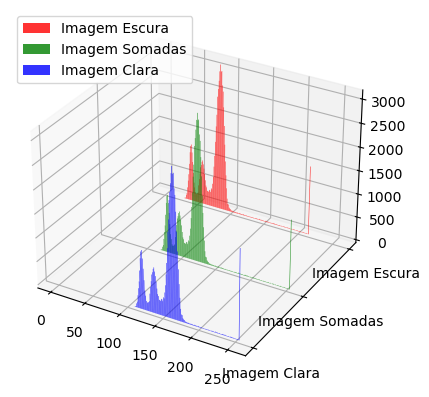

In [54]:
# Preparar os dados dos histogramas
hist_somadas = cv2.calcHist([imagemSomadas], [0], None, [256], [0, 256]).ravel()
hist_clara = cv2.calcHist([imagemClara], [0], None, [256], [0, 256]).ravel()
hist_escura = cv2.calcHist([imagemEscura], [0], None, [256], [0, 256]).ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Definir os valores de x para os histogramas (intervalo de bins)
bins = np.arange(256)

# Configurar os histogramas nos planos Z
colors = ['r', 'g', 'b']
histograms = [hist_escura, hist_somadas, hist_clara]
yticks = [2, 1, 0]
labels = ['Imagem Escura', 'Imagem Somadas', 'Imagem Clara']

for c, hist, y in zip(colors, histograms, yticks):
    ax.bar(bins, hist, zs=y, zdir='y', color=c, alpha=0.8, label=labels[yticks.index(y)])

# Definir as marcas do eixo y
ax.set_yticks(yticks)
ax.set_yticklabels(labels)

plt.legend()
plt.show()

## Operação de Subtração:

A subtração de uma imagem por outra nos fornece as diferenças entre as duas imagens. Com uma câmera fixa, ao fotografarmos uma sequência de imagens	 de	 um objeto em movimento, este método	nos	permite	visualizar as mudanças ou os movimentos	que	ocorreram entre	uma	captura	e outra. Para esse propósitos usamos a função `subtract()`.

In [61]:
imagemSubtraida = cv2.subtract(imagemFichasVermelhas, imagemFichasPretas)

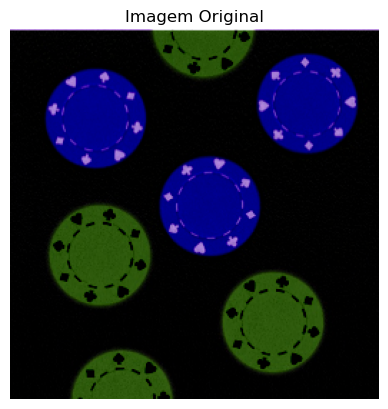

In [63]:
plt.imshow(imagemSubtraida)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

Podemos ainda binarizar essa imagem, de modo que fique ainda mais fácil de trabalahr com ela. Mas vamos ver esse tópiro melhor mais pra frente, é mais útil na parte de segmentação da imagem.

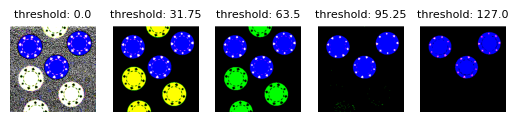

In [92]:
# Gerando treshholds:
threshold_values = np.linspace(0, 127, 5)

for i,threshold in enumerate(threshold_values):
    _, imagemBinarizada = cv2.threshold(imagemSubtraida, threshold, 255, cv2.THRESH_BINARY)
    
    # Exibir a imagem binarizada
    plt.subplot(1,len(threshold_values),i+1)
    plt.imshow(imagemBinarizada, cmap='gray')
    plt.title(f'threshold: {threshold}', fontsize=8)
    plt.axis('off')
plt.show()

## Operação de Mistura:

A operação de mistura consiste em mesclar, **com perda de dados**, as informações de imagens em apenas uma. Em outras palavras, ela também realiza a soma entre os valores dos *pixels* das imagens, entretanto, com pesos diferentes, mesclando-se as proporcionando um efeito de minstura ou transparência. A função `addWeighted()` nos ajuda nesse propósito, tendo ela cinco parâmetros obrigatórios:

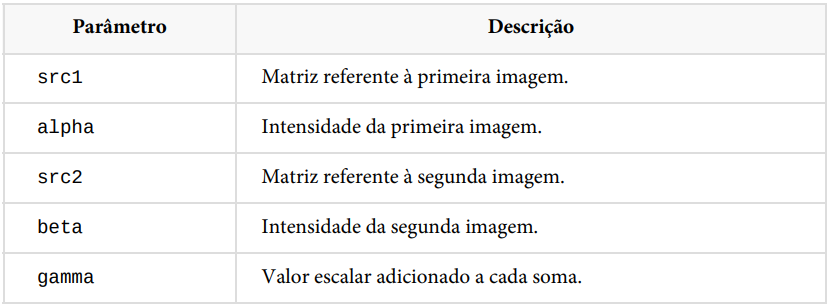

(-0.5, 257.5, 258.5, -0.5)

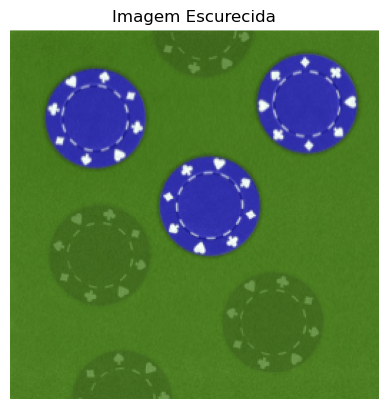

In [93]:
# Mesclando imagens:
imagemMescladas	= cv2.addWeighted(imagemFichasPretas, 0.2,imagemFichasVermelhas, 1.0, 0)

# Plotando imagem:
plt.imshow(imagemMescladas)
plt.title("Imagem Escurecida")
plt.axis('off')

## Operações de multiplicação e divisão:

A operação de multiplicação entre duas imagens pode ser efetuada pela função `multiply` da biblioteca OpenCV. Esta operação efetua o produto escalar entre os valores dos pixels de mesma posição nas duas imagens. Essa função pode ser usada também para multiplicar os valores dos pixels por um mesmo número inteiro positivo.

Uma outra operação que pode ser efetuada é a de divisão. Além de funcionar como um simples método para ajuste de contraste, ela pode ser usada para discriminar uma imagem da outra, ou seja, verificar se elas são idênticas ou não. Para que duas imagens sejam idênticas, quando realizada a divisão de uma pela outra, os valores que representam cada pixel devem ser iguais a 1.

Apesar de parecer uma boa solução, dividir uma imagem por outra exige mais processamento do que as subtrair. Sendo assim, não é um algoritmo muito eficiente para determinar se duas imagens são idênticas ou não.

A função da biblioteca OpenCV que nos permite dividir uma imagem por outra é a `divide`. Mais informações sobre esta e a função `multiply` podem ser encontradas na documentação oficial do OpenCV. As operações de multiplicação e divisão de imagens não são muito usadas e, por esse motivo, não serão exemplificadas aqui.ivo.